<a href="https://colab.research.google.com/github/YuriSerhiienko/data_science_hw5/blob/main/hw5_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!gdown --id 1nzrtQpfaHL0OgJ_eXzA7VuEj7XotrSWO -O homework.zip
!unzip -q homework.zip

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1nzrtQpfaHL0OgJ_eXzA7VuEj7XotrSWO
To: /content/homework.zip
100% 4.21M/4.21M [00:00<00:00, 227MB/s]


In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [3]:
def load_and_combine_data(folder_path):
    combined_data = pd.DataFrame()
    for activity in os.listdir(folder_path):
        activity_path = os.path.join(folder_path, activity)
        if os.path.isdir(activity_path):
            for file in os.listdir(activity_path):
                file_path = os.path.join(activity_path, file)
                data = pd.read_csv(file_path)
                data['Activity'] = activity
                combined_data = pd.concat([combined_data, data], ignore_index=True)
    return combined_data

data_folder = 'data'
combined_data = load_and_combine_data(data_folder)
combined_data.head()

,accelerometer_X,accelerometer_Y,accelerometer_Z,Activity
0,0.258574,-0.004788,9.749189,idle
1,0.244209,-0.014365,9.773131,idle
2,0.239420,-0.023942,9.787497,idle
3,0.272939,-0.019154,9.782708,idle
4,0.263362,-0.014365,9.787497,idle


In [4]:
print(f"Кількість дублікатів перед видаленням: {combined_data.duplicated().sum()}")
combined_data.drop_duplicates(inplace=True)
print(f"Кількість дублікатів після видалення: {combined_data.duplicated().sum()}")

Кількість дублікатів перед видаленням: 180673
Кількість дублікатів після видалення: 0


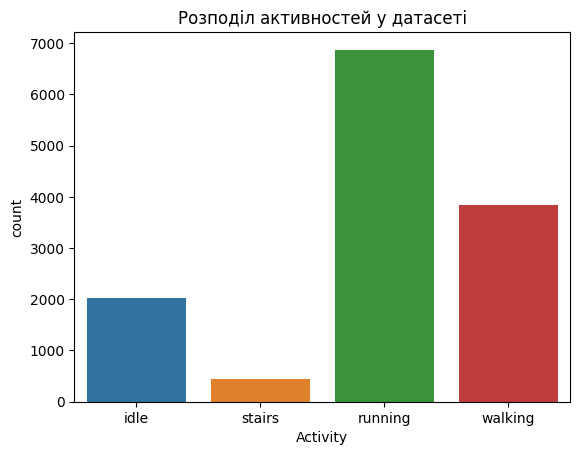

In [5]:
sns.countplot(x='Activity', data=combined_data)
plt.title('Розподіл активностей у датасеті')
plt.show()

In [6]:
# Додавання часових ознак до даних
def add_time_domain_features(df, axis_names):
    for axis in axis_names:
        df[axis + '_mean'] = df[axis].mean()
        df[axis + '_std'] = df[axis].std()
        df[axis + '_min'] = df[axis].min()
        df[axis + '_max'] = df[axis].max()

add_time_domain_features(combined_data, ['accelerometer_X', 'accelerometer_Y', 'accelerometer_Z'])
combined_data.head()

,accelerometer_X,accelerometer_Y,accelerometer_Z,Activity,accelerometer_X_mean,accelerometer_X_std,accelerometer_X_min,accelerometer_X_max,accelerometer_Y_mean,accelerometer_Y_std,accelerometer_Y_min,accelerometer_Y_max,accelerometer_Z_mean,accelerometer_Z_std,accelerometer_Z_min,accelerometer_Z_max
0,0.258574,-0.004788,9.749189,idle,1.902512,8.363792,-39.188293,39.188293,1.445794,12.462532,-39.188293,39.188293,1.756228,7.181267,-39.188293,39.188293
1,0.244209,-0.014365,9.773131,idle,1.902512,8.363792,-39.188293,39.188293,1.445794,12.462532,-39.188293,39.188293,1.756228,7.181267,-39.188293,39.188293
2,0.239420,-0.023942,9.787497,idle,1.902512,8.363792,-39.188293,39.188293,1.445794,12.462532,-39.188293,39.188293,1.756228,7.181267,-39.188293,39.188293
3,0.272939,-0.019154,9.782708,idle,1.902512,8.363792,-39.188293,39.188293,1.445794,12.462532,-39.188293,39.188293,1.756228,7.181267,-39.188293,39.188293
4,0.263362,-0.014365,9.787497,idle,1.902512,8.363792,-39.188293,39.188293,1.445794,12.462532,-39.188293,39.188293,1.756228,7.181267,-39.188293,39.188293


In [7]:
X = combined_data.drop('Activity', axis=1)
y = combined_data['Activity']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [8]:
# Тренування SVM моделі
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

# Тренування Random Forest моделі
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Оцінка точності моделей
print("SVM Classification Report:")
print(classification_report(y_test, svm_predictions))

print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

SVM Classification Report:
              precision    recall  f1-score   support

        idle       0.92      0.98      0.95       411
     running       0.90      0.89      0.90      1380
      stairs       0.00      0.00      0.00        99
     walking       0.77      0.86      0.81       748

    accuracy                           0.86      2638
   macro avg       0.65      0.68      0.67      2638
weighted avg       0.83      0.86      0.85      2638

Random Forest Classification Report:
              precision    recall  f1-score   support

        idle       0.97      0.97      0.97       411
     running       0.90      0.91      0.90      1380
      stairs       0.21      0.03      0.05        99
     walking       0.79      0.86      0.82       748

    accuracy                           0.87      2638
   macro avg       0.72      0.69      0.69      2638
weighted avg       0.85      0.87      0.86      2638



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
# Візуалізація точності моделей
accuracy_svm = accuracy_score(y_test, svm_predictions)
accuracy_rf = accuracy_score(y_test, rf_predictions)

print(f"SVM Accuracy: {accuracy_svm:.2f}")
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")

SVM Accuracy: 0.86
Random Forest Accuracy: 0.87
